In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)

In [1]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, TrendLine, SameAxes
from mplchart.indicators import RSI, RSIDIV
from auto_chart_patterns.trendline_patterns import TrendLineProperties
from auto_chart_patterns.rsi_div_patterns import RsiDivergenceProperties

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="1y")

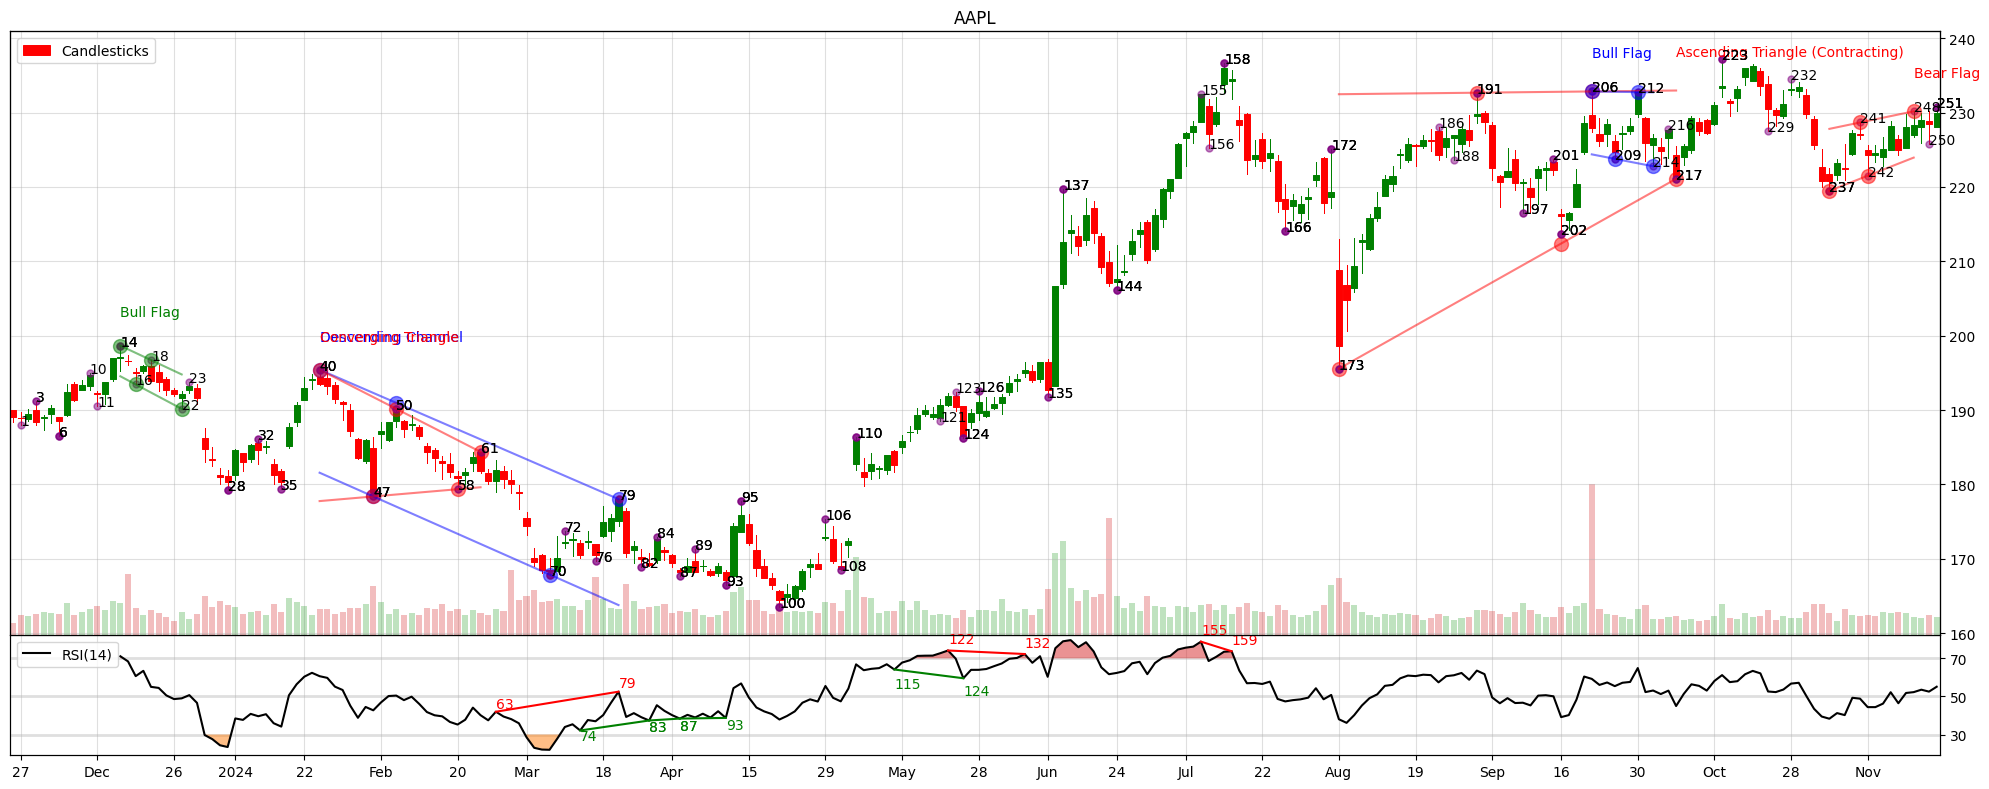

In [2]:
# Configure pattern scanning
scan_props = TrendLineProperties(
        number_of_pivots=5,
        flat_ratio=0.05,
        #align_ratio=0.2,
    )

scan_props_pf = TrendLineProperties(
        number_of_pivots=4,
)

scan_props_rsi = RsiDivergenceProperties(
    min_change_pct=0.005,
)

indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    TrendLine(backcandels=5, forwardcandels=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandels=3, forwardcandels=3, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandels=2, forwardcandels=2, pivot_limit=100, show_pivots=True, scan_props=scan_props_pf),
    RSI(),
    RSIDIV(backcandels=2, forwardcandels=2, show_pivots=True, scan_props=scan_props_rsi) | SameAxes(),
    # SMA(50),
    # SMA(200),
    # MACD(),
]

chart = Chart(title=ticker, figsize=(20, 8), max_ticks=90)
chart.plot(prices, indicators)



## Debug Zigzag

In [3]:
from auto_chart_patterns.zigzag import Zigzag

zigzag = Zigzag(backcandels=5, forwardcandels=5, pivot_limit=55, offset=0)
prices["high"] = prices["High"]
prices["low"] = prices["Low"]
prices["close"] = prices["Close"]
prices["open"] = prices["Open"]
zigzag.calculate(prices)

for pivot in zigzag.zigzag_pivots:
    print(f"Pivot: time={pivot.point.time}, index={pivot.point.index}, price={pivot.point.price}, diff={pivot.cross_diff}")
print(f"Number of pivots: {len(zigzag.zigzag_pivots)}")

Pivot: time=2024-11-22 00:00:00-05:00, index=251, price=230.72000122070312, diff=-6.5090000880540515
Pivot: time=2024-11-04 00:00:00-05:00, index=237, price=219.46854635353304, diff=-1.6182140328616867
Pivot: time=2024-10-15 00:00:00-04:00, index=223, price=237.22900130875718, diff=4.3951725728067
Pivot: time=2024-10-07 00:00:00-04:00, index=217, price=221.08676038639473, diff=7.401856582636128
Pivot: time=2024-09-20 00:00:00-04:00, index=206, price=232.83382873595048, diff=0.16980331631020817
Pivot: time=2024-09-16 00:00:00-04:00, index=202, price=213.6849038037586, diff=18.126659555371162
Pivot: time=2024-08-29 00:00:00-04:00, index=191, price=232.66402541964027, diff=7.572485542587231
Pivot: time=2024-08-05 00:00:00-04:00, index=173, price=195.55824424838744, diff=-18.578030826554794
Pivot: time=2024-08-02 00:00:00-04:00, index=172, price=225.09153987705304, diff=-11.603772365425726
Pivot: time=2024-07-25 00:00:00-04:00, index=166, price=214.13627507494223, diff=8.011901474554321
Pi